# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# How many random locations do we start with in this analysis?
cnt = 1500

# What's the maximum humidity level in this analysis?
humid_level = 100

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=cnt)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=cnt)
lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count (Greater than 500)
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# set up lists to hold reponse info
cities2 = []
lats2 = []
lngs2 = []
max_temps = []
min_temps = []
humids = []
clouds = []
winds = []
countries = []
weather_dates = []
hems = []
cities_not_found = []

count = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    # Try to grab the weather data if the city is found
    try:
        city_name = (response['name'])
        lat2 = (response['coord']['lat'])
        hem = "Northern" if (lat2 >= 0.0) else "Southern"
        lng2 = (response['coord']['lon'])
        temp_max = (response['main']['temp_max'])
        temp_min = (response['main']['temp_min'])
        humid = (response['main']['humidity'])
        cloud = (response['clouds']['all'])
        wind = (response['wind']['speed'])
        country = (response['sys']['country'])
        weather_date = pd.to_datetime((response['dt']), unit='s').date().strftime('%m/%d/%Y')

        count = count +1
        print(f"{count}: {city_name}")              
        print(f"located in {hem} hemisphere")
        print(f"City latitude: {lat2}")
        print(f"City longitude: {lng2}")
        print(f"Max temperature: {temp_max}")
        print(f"Min temperature: {temp_min}")        
        print(f"Humidity: {humid}")
        print(f"Cloud coverage: {cloud}")
        print(f"Wind speed: {wind}")
        print(f"City country: {country}")
        print(f"Weather date: {weather_date}")      
        print()
        
        cities2.append(city_name)
        hems.append(hem)        
        lats2.append(lat2)
        lngs2.append(lng2)
        max_temps.append(temp_max)
        min_temps.append(temp_min)
        humids.append(humid)
        clouds.append(cloud)
        winds.append(wind)
        countries.append(country)
        weather_dates.append(weather_date)

        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        print(f"{city} NOT FOUND")
        print()
        cities_not_found.append(city)
        pass

1: Pimentel
located in Southern hemisphere
City latitude: -6.84
City longitude: -79.93
Max temperature: 59.85
Min temperature: 59.85
Humidity: 88
Cloud coverage: 17
Wind speed: 12.77
City country: PE
Weather date: 07/28/2020

2: Krasnokamensk
located in Northern hemisphere
City latitude: 50.1
City longitude: 118.04
Max temperature: 74.84
Min temperature: 74.84
Humidity: 63
Cloud coverage: 95
Wind speed: 14.65
City country: RU
Weather date: 07/28/2020

3: Kapaa
located in Northern hemisphere
City latitude: 22.08
City longitude: -159.32
Max temperature: 82.4
Min temperature: 80.01
Humidity: 69
Cloud coverage: 40
Wind speed: 21.92
City country: US
Weather date: 07/28/2020

4: Albany
located in Northern hemisphere
City latitude: 42.6
City longitude: -73.97
Max temperature: 82
Min temperature: 77
Humidity: 78
Cloud coverage: 60
Wind speed: 5.17
City country: US
Weather date: 07/28/2020

5: Borazjan
located in Northern hemisphere
City latitude: 29.27
City longitude: 51.22
Max temperature: 93

39: Pignon
located in Northern hemisphere
City latitude: 19.33
City longitude: -72.12
Max temperature: 71.62
Min temperature: 71.62
Humidity: 90
Cloud coverage: 89
Wind speed: 4
City country: HT
Weather date: 07/28/2020

40: Yeppoon
located in Southern hemisphere
City latitude: -23.13
City longitude: 150.73
Max temperature: 73.4
Min temperature: 73.4
Humidity: 25
Cloud coverage: 0
Wind speed: 11.41
City country: AU
Weather date: 07/28/2020

taolanaro NOT FOUND

41: Saldanha
located in Southern hemisphere
City latitude: -33.01
City longitude: 17.94
Max temperature: 46.4
Min temperature: 46.4
Humidity: 75
Cloud coverage: 0
Wind speed: 1.12
City country: ZA
Weather date: 07/28/2020

42: Port Elizabeth
located in Southern hemisphere
City latitude: -33.92
City longitude: 25.57
Max temperature: 44.6
Min temperature: 44.6
Humidity: 87
Cloud coverage: 0
Wind speed: 4.7
City country: ZA
Weather date: 07/28/2020

43: Saint George
located in Northern hemisphere
City latitude: 37.1
City longitude:

76: Pemba
located in Southern hemisphere
City latitude: -12.97
City longitude: 40.52
Max temperature: 70.02
Min temperature: 70.02
Humidity: 85
Cloud coverage: 2
Wind speed: 13.8
City country: MZ
Weather date: 07/28/2020

77: Goderich
located in Northern hemisphere
City latitude: 43.75
City longitude: -81.72
Max temperature: 73
Min temperature: 69.01
Humidity: 77
Cloud coverage: 31
Wind speed: 8.01
City country: CA
Weather date: 07/28/2020

78: Hasaki
located in Northern hemisphere
City latitude: 35.73
City longitude: 140.83
Max temperature: 84.2
Min temperature: 82.99
Humidity: 74
Cloud coverage: 75
Wind speed: 13.87
City country: JP
Weather date: 07/28/2020

dekoa NOT FOUND

79: Vladičin Han
located in Northern hemisphere
City latitude: 42.71
City longitude: 22.06
Max temperature: 57
Min temperature: 57
Humidity: 91
Cloud coverage: 0
Wind speed: 1.39
City country: RS
Weather date: 07/28/2020

80: Jamestown
located in Northern hemisphere
City latitude: 42.1
City longitude: -79.24
Max 

112: Tsiroanomandidy
located in Southern hemisphere
City latitude: -18.77
City longitude: 46.03
Max temperature: 60.19
Min temperature: 60.19
Humidity: 55
Cloud coverage: 94
Wind speed: 1.95
City country: MG
Weather date: 07/28/2020

113: Río Gallegos
located in Southern hemisphere
City latitude: -51.62
City longitude: -69.22
Max temperature: 28.4
Min temperature: 28.4
Humidity: 86
Cloud coverage: 37
Wind speed: 8.05
City country: AR
Weather date: 07/28/2020

114: Hilo
located in Northern hemisphere
City latitude: 19.73
City longitude: -155.09
Max temperature: 82.4
Min temperature: 71.01
Humidity: 61
Cloud coverage: 90
Wind speed: 10.29
City country: US
Weather date: 07/28/2020

115: Valparai
located in Northern hemisphere
City latitude: 10.37
City longitude: 76.97
Max temperature: 80.6
Min temperature: 80.6
Humidity: 88
Cloud coverage: 75
Wind speed: 4.38
City country: IN
Weather date: 07/28/2020

116: Touros
located in Southern hemisphere
City latitude: -5.2
City longitude: -35.46
Ma

149: Coquimbo
located in Southern hemisphere
City latitude: -29.95
City longitude: -71.34
Max temperature: 51.8
Min temperature: 51.8
Humidity: 87
Cloud coverage: 0
Wind speed: 1.12
City country: CL
Weather date: 07/28/2020

150: Collie
located in Southern hemisphere
City latitude: -33.37
City longitude: 116.15
Max temperature: 61
Min temperature: 55.99
Humidity: 98
Cloud coverage: 78
Wind speed: 7.54
City country: AU
Weather date: 07/28/2020

151: Yar-Sale
located in Northern hemisphere
City latitude: 66.83
City longitude: 70.83
Max temperature: 56.14
Min temperature: 56.14
Humidity: 56
Cloud coverage: 83
Wind speed: 15.46
City country: RU
Weather date: 07/28/2020

152: Dumas
located in Northern hemisphere
City latitude: 35.87
City longitude: -101.97
Max temperature: 72
Min temperature: 68
Humidity: 94
Cloud coverage: 75
Wind speed: 6.93
City country: US
Weather date: 07/28/2020

belushya guba NOT FOUND

153: Kumluca
located in Northern hemisphere
City latitude: 36.37
City longitude: 

186: Thompson
located in Northern hemisphere
City latitude: 55.74
City longitude: -97.86
Max temperature: 59
Min temperature: 59
Humidity: 77
Cloud coverage: 75
Wind speed: 5.82
City country: CA
Weather date: 07/28/2020

187: Bluff
located in Southern hemisphere
City latitude: -46.6
City longitude: 168.33
Max temperature: 48
Min temperature: 48
Humidity: 83
Cloud coverage: 100
Wind speed: 4.41
City country: NZ
Weather date: 07/28/2020

188: Zhigansk
located in Northern hemisphere
City latitude: 66.77
City longitude: 123.37
Max temperature: 54.97
Min temperature: 54.97
Humidity: 65
Cloud coverage: 41
Wind speed: 17.67
City country: RU
Weather date: 07/28/2020

189: Khatanga
located in Northern hemisphere
City latitude: 71.97
City longitude: 102.5
Max temperature: 55.71
Min temperature: 55.71
Humidity: 52
Cloud coverage: 0
Wind speed: 5.37
City country: RU
Weather date: 07/28/2020

190: Fortuna
located in Northern hemisphere
City latitude: 40.6
City longitude: -124.16
Max temperature: 61

mocambique NOT FOUND

223: Sept-Îles
located in Northern hemisphere
City latitude: 50.2
City longitude: -66.38
Max temperature: 63
Min temperature: 61
Humidity: 88
Cloud coverage: 40
Wind speed: 5.26
City country: CA
Weather date: 07/28/2020

224: Vestmanna
located in Northern hemisphere
City latitude: 62.16
City longitude: -7.17
Max temperature: 46.4
Min temperature: 46.4
Humidity: 93
Cloud coverage: 78
Wind speed: 14.99
City country: FO
Weather date: 07/28/2020

225: Baiyin
located in Northern hemisphere
City latitude: 36.56
City longitude: 104.21
Max temperature: 75.2
Min temperature: 75.2
Humidity: 38
Cloud coverage: 8
Wind speed: 8.95
City country: CN
Weather date: 07/28/2020

226: Prainha
located in Southern hemisphere
City latitude: -1.8
City longitude: -53.48
Max temperature: 76.82
Min temperature: 76.82
Humidity: 69
Cloud coverage: 0
Wind speed: 2.13
City country: BR
Weather date: 07/28/2020

227: Ladysmith
located in Northern hemisphere
City latitude: 48.98
City longitude: -1

260: Shache
located in Northern hemisphere
City latitude: 38.42
City longitude: 77.24
Max temperature: 85.51
Min temperature: 85.51
Humidity: 14
Cloud coverage: 0
Wind speed: 12.5
City country: CN
Weather date: 07/28/2020

261: Tommot
located in Northern hemisphere
City latitude: 58.96
City longitude: 126.29
Max temperature: 85.01
Min temperature: 85.01
Humidity: 53
Cloud coverage: 25
Wind speed: 5.75
City country: RU
Weather date: 07/28/2020

262: Along
located in Northern hemisphere
City latitude: 28.17
City longitude: 94.77
Max temperature: 78.01
Min temperature: 78.01
Humidity: 86
Cloud coverage: 100
Wind speed: 1.05
City country: IN
Weather date: 07/28/2020

263: Pacific Grove
located in Northern hemisphere
City latitude: 36.62
City longitude: -121.92
Max temperature: 62.6
Min temperature: 59
Humidity: 77
Cloud coverage: 75
Wind speed: 6.93
City country: US
Weather date: 07/28/2020

264: Freeport
located in Northern hemisphere
City latitude: 40.66
City longitude: -73.58
Max temper

298: Arraial do Cabo
located in Southern hemisphere
City latitude: -22.97
City longitude: -42.03
Max temperature: 71.62
Min temperature: 71.62
Humidity: 81
Cloud coverage: 0
Wind speed: 24.4
City country: BR
Weather date: 07/28/2020

burica NOT FOUND

299: Kruisfontein
located in Southern hemisphere
City latitude: -34
City longitude: 24.73
Max temperature: 49.73
Min temperature: 49.73
Humidity: 59
Cloud coverage: 0
Wind speed: 7.02
City country: ZA
Weather date: 07/28/2020

300: Guerrero Negro
located in Northern hemisphere
City latitude: 27.98
City longitude: -114.06
Max temperature: 67.86
Min temperature: 67.86
Humidity: 85
Cloud coverage: 0
Wind speed: 18.7
City country: MX
Weather date: 07/28/2020

301: Sydney Mines
located in Northern hemisphere
City latitude: 46.24
City longitude: -60.22
Max temperature: 62.01
Min temperature: 60.8
Humidity: 100
Cloud coverage: 75
Wind speed: 6.93
City country: CA
Weather date: 07/28/2020

302: Vila Franca do Campo
located in Northern hemisphere


335: Gigmoto
located in Northern hemisphere
City latitude: 13.78
City longitude: 124.39
Max temperature: 84.16
Min temperature: 84.16
Humidity: 78
Cloud coverage: 100
Wind speed: 6.76
City country: PH
Weather date: 07/28/2020

336: Ryōtsu-minato
located in Northern hemisphere
City latitude: 38.08
City longitude: 138.43
Max temperature: 75.2
Min temperature: 75.2
Humidity: 94
Cloud coverage: 90
Wind speed: 5.82
City country: JP
Weather date: 07/28/2020

337: Kuril'sk
located in Northern hemisphere
City latitude: 45.23
City longitude: 147.88
Max temperature: 57.9
Min temperature: 57.9
Humidity: 76
Cloud coverage: 99
Wind speed: 2.46
City country: RU
Weather date: 07/28/2020

338: Umeå
located in Northern hemisphere
City latitude: 63.83
City longitude: 20.26
Max temperature: 59
Min temperature: 57.99
Humidity: 100
Cloud coverage: 90
Wind speed: 3.33
City country: SE
Weather date: 07/28/2020

339: Marsh Harbour
located in Northern hemisphere
City latitude: 26.54
City longitude: -77.06
Max 

372: Iquique
located in Southern hemisphere
City latitude: -20.22
City longitude: -70.14
Max temperature: 59
Min temperature: 59
Humidity: 67
Cloud coverage: 90
Wind speed: 4.7
City country: CL
Weather date: 07/28/2020

373: Terrace Bay
located in Northern hemisphere
City latitude: 48.78
City longitude: -87.1
Max temperature: 59.09
Min temperature: 59.09
Humidity: 83
Cloud coverage: 94
Wind speed: 4.47
City country: CA
Weather date: 07/28/2020

374: Mehamn
located in Northern hemisphere
City latitude: 71.04
City longitude: 27.85
Max temperature: 61.57
Min temperature: 61.57
Humidity: 66
Cloud coverage: 0
Wind speed: 9.35
City country: NO
Weather date: 07/28/2020

375: Disna
located in Northern hemisphere
City latitude: 55.57
City longitude: 28.2
Max temperature: 60.64
Min temperature: 60.64
Humidity: 97
Cloud coverage: 100
Wind speed: 4.83
City country: BY
Weather date: 07/28/2020

376: Meadville
located in Northern hemisphere
City latitude: 41.64
City longitude: -80.15
Max temperature

408: Ketchikan
located in Northern hemisphere
City latitude: 55.34
City longitude: -131.65
Max temperature: 62.6
Min temperature: 60.8
Humidity: 63
Cloud coverage: 75
Wind speed: 11.41
City country: US
Weather date: 07/28/2020

409: Iralaya
located in Northern hemisphere
City latitude: 15
City longitude: -83.23
Max temperature: 81.41
Min temperature: 81.41
Humidity: 82
Cloud coverage: 82
Wind speed: 15.08
City country: HN
Weather date: 07/28/2020

410: São João do Piauí
located in Southern hemisphere
City latitude: -8.36
City longitude: -42.25
Max temperature: 72.79
Min temperature: 72.79
Humidity: 69
Cloud coverage: 12
Wind speed: 8.34
City country: BR
Weather date: 07/28/2020

411: Chicama
located in Southern hemisphere
City latitude: -7.84
City longitude: -79.15
Max temperature: 59.83
Min temperature: 59.83
Humidity: 84
Cloud coverage: 18
Wind speed: 4.56
City country: PE
Weather date: 07/28/2020

412: Wagar
located in Northern hemisphere
City latitude: 16.15
City longitude: 36.2
Ma

karkaralinsk NOT FOUND

445: Bjørnevatn
located in Northern hemisphere
City latitude: 69.67
City longitude: 29.98
Max temperature: 57.2
Min temperature: 57.2
Humidity: 87
Cloud coverage: 0
Wind speed: 4.7
City country: NO
Weather date: 07/28/2020

446: Kidal
located in Northern hemisphere
City latitude: 18.44
City longitude: 1.41
Max temperature: 82.99
Min temperature: 82.99
Humidity: 56
Cloud coverage: 99
Wind speed: 13.53
City country: ML
Weather date: 07/28/2020

447: Toguchin
located in Northern hemisphere
City latitude: 55.24
City longitude: 84.39
Max temperature: 64.38
Min temperature: 64.38
Humidity: 79
Cloud coverage: 52
Wind speed: 0.43
City country: RU
Weather date: 07/28/2020

448: Klaksvík
located in Northern hemisphere
City latitude: 62.23
City longitude: -6.59
Max temperature: 46.4
Min temperature: 46.4
Humidity: 93
Cloud coverage: 97
Wind speed: 14.99
City country: FO
Weather date: 07/28/2020

skalistyy NOT FOUND

449: Darhan
located in Northern hemisphere
City latitude:

481: Wawa
located in Northern hemisphere
City latitude: 9.9
City longitude: 4.42
Max temperature: 72.55
Min temperature: 72.55
Humidity: 94
Cloud coverage: 95
Wind speed: 4.63
City country: NG
Weather date: 07/28/2020

482: Vorselaar
located in Northern hemisphere
City latitude: 51.2
City longitude: 4.77
Max temperature: 66
Min temperature: 64.99
Humidity: 79
Cloud coverage: 84
Wind speed: 3
City country: BE
Weather date: 07/28/2020

483: Maracás
located in Southern hemisphere
City latitude: -13.44
City longitude: -40.43
Max temperature: 58.08
Min temperature: 58.08
Humidity: 100
Cloud coverage: 78
Wind speed: 6.2
City country: BR
Weather date: 07/28/2020

ust-kamchatsk NOT FOUND

kazalinsk NOT FOUND

484: Cockburn Town
located in Northern hemisphere
City latitude: 21.46
City longitude: -71.14
Max temperature: 82.49
Min temperature: 82.49
Humidity: 76
Cloud coverage: 1
Wind speed: 18.03
City country: TC
Weather date: 07/28/2020

485: Peniche
located in Northern hemisphere
City latitude

518: Lewistown
located in Northern hemisphere
City latitude: 40.6
City longitude: -77.57
Max temperature: 82.4
Min temperature: 77
Humidity: 61
Cloud coverage: 1
Wind speed: 3.36
City country: US
Weather date: 07/28/2020

519: Geraldton
located in Southern hemisphere
City latitude: -28.77
City longitude: 114.6
Max temperature: 66.2
Min temperature: 66.2
Humidity: 77
Cloud coverage: 90
Wind speed: 11.41
City country: AU
Weather date: 07/28/2020

520: Muroto-misakicho
located in Northern hemisphere
City latitude: 33.28
City longitude: 134.15
Max temperature: 82.4
Min temperature: 82.4
Humidity: 94
Cloud coverage: 75
Wind speed: 6.93
City country: JP
Weather date: 07/28/2020

jarjis NOT FOUND

521: Wates
located in Southern hemisphere
City latitude: -8.13
City longitude: 111.95
Max temperature: 80.47
Min temperature: 80.47
Humidity: 64
Cloud coverage: 75
Wind speed: 13.02
City country: ID
Weather date: 07/28/2020

522: Husavik
located in Northern hemisphere
City latitude: 66.04
City longi

In [6]:
# How many cities weren't found
print(f"Number of cities not found: {len(cities_not_found)}")

Number of cities not found: 64


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
city_dict = {
    "City": cities2,
    "Hemisphere": hems,
    "Lat": lats2,
    "Lng": lngs2,
    "Max Temp": max_temps,
    "Min Temp": min_temps,    
    "Humidity": humids,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": countries,
    "Weather Date": weather_dates
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Hemisphere,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Date
0,Pimentel,Southern,-6.84,-79.93,59.85,59.85,88,17,12.77,PE,07/28/2020
1,Krasnokamensk,Northern,50.10,118.04,74.84,74.84,63,95,14.65,RU,07/28/2020
2,Kapaa,Northern,22.08,-159.32,82.40,80.01,69,40,21.92,US,07/28/2020
3,Albany,Northern,42.60,-73.97,82.00,77.00,78,60,5.17,US,07/28/2020
4,Borazjan,Northern,29.27,51.22,93.20,93.20,75,40,18.34,IR,07/28/2020


In [8]:
# Export file as a CSV, without the Pandas index, but with the header
city_data.to_csv("../Results/city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# How many cities have humidity over 100%
list_values = city_data["Humidity"][city_data["Humidity"] > humid_level]
list_values.count()

0

In [10]:
# Get the index and humidity of the cities that have humidity over 100%
city_data["Humidity"][city_data["Humidity"] > humid_level]

Series([], Name: Humidity, dtype: int64)

In [11]:
# Get the indices of cities that have humidity over 100%
index_list = city_data["Humidity"][city_data["Humidity"] > humid_level].index.tolist()
index_list

[]

In [12]:
# Create a clean DataFrame by dropping the high humidity rows by its index
clean_city_data = city_data.drop(index_list,inplace=False)
clean_city_data.head()

,City,Hemisphere,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed,Country,Weather Date
0,Pimentel,Southern,-6.84,-79.93,59.85,59.85,88,17,12.77,PE,07/28/2020
1,Krasnokamensk,Northern,50.10,118.04,74.84,74.84,63,95,14.65,RU,07/28/2020
2,Kapaa,Northern,22.08,-159.32,82.40,80.01,69,40,21.92,US,07/28/2020
3,Albany,Northern,42.60,-73.97,82.00,77.00,78,60,5.17,US,07/28/2020
4,Borazjan,Northern,29.27,51.22,93.20,93.20,75,40,18.34,IR,07/28/2020


In [13]:
# Print the clean city count
len(clean_city_data)

532

In [14]:
# Export the Clean City Data into a csv
clean_city_data.to_csv("../Results/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Save the plotted figures as .pngs.

532


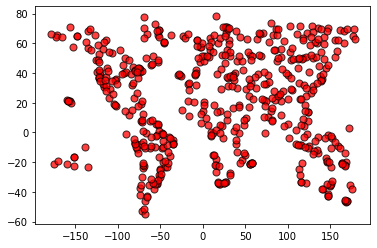

In [15]:
# Read csv file into dataframe and generate scatter plot to make sure that cities are distributed throughout the globe

# File to Load
city_data_to_load = "../Results/clean_city_data.csv"

cities = pd.read_csv(city_data_to_load, encoding="utf-8")

# print total # of selected cities
print(len(cities)) 

# generate the scatter plot to make sure that the cities are evenly distributed throughout the globe
plt.scatter(cities["Lng"],cities["Lat"],marker="o",facecolors="red",edgecolors="black",s=50,alpha=0.75)

weatherDate = cities["Weather Date"][0]

## Latitude vs. Temperature Plot

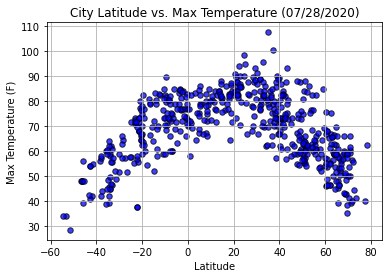

In [16]:
plt.scatter(cities['Lat'],cities['Max Temp'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../Results/City_Latitude_VS_Max_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

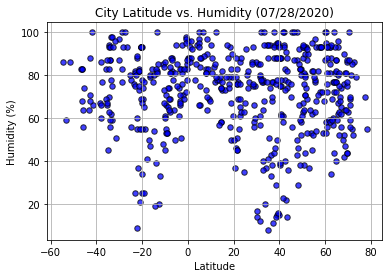

In [17]:
plt.scatter(cities['Lat'],cities['Humidity'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Results/City_Latitude_VS_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

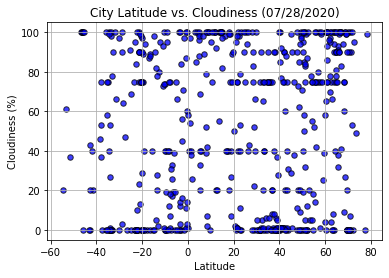

In [18]:
plt.scatter(cities['Lat'],cities['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Results/City_Latitude_VS_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

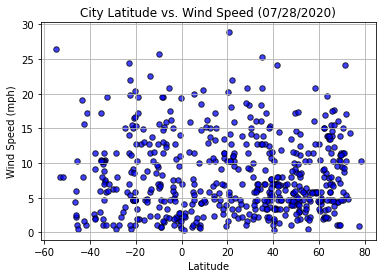

In [19]:
plt.scatter(cities['Lat'],cities['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Results/City_Latitude_VS_Wind_Speed.png")
plt.show()

## Linear Regression

#### Create subset dataframes for Northern and Southern Hemispheres

In [20]:
northern = cities.loc[cities["Hemisphere"] == "Northern"]
northern.reset_index(inplace=True)

In [21]:
southern = cities.loc[cities["Hemisphere"] == "Southern"]
southern.reset_index(inplace=True)

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

# Define plotting function    
def plotLinearRegression(xdata,ydata,xlbl,ylbl,x_ann,y_ann,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata,edgecolors='black')
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f"../Results/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6777764019154308
y = -0.45x + 88.83


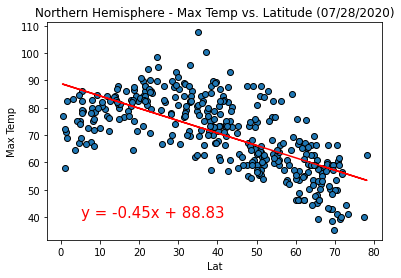

In [23]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Max Temp"
x_ann = 5
y_ann = 40
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,x_ann,y_ann,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7860940988251728
y = 0.77x + 80.7


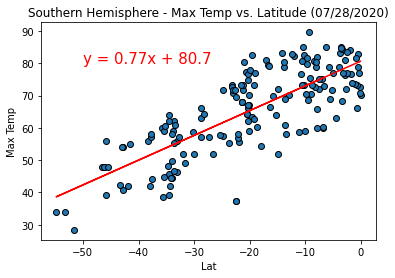

In [24]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Max Temp"
x_ann = -50
y_ann = 80
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,x_ann,y_ann,2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08952576162673623
y = -0.09x + 75.57


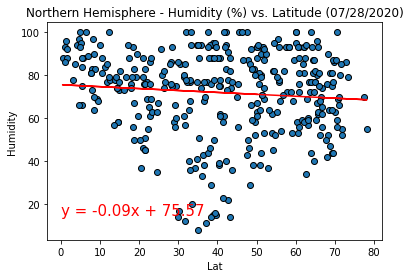

In [25]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Humidity"
x_ann = 0
y_ann = 15
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,x_ann,y_ann,3)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03259745063401595
y = -0.04x + 71.64


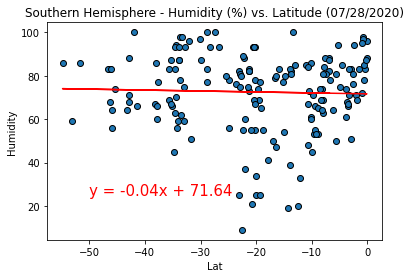

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Humidity"
x_ann = -50
y_ann = 25
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,x_ann,y_ann,4)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011625854941895414
y = 0.02x + 53.04


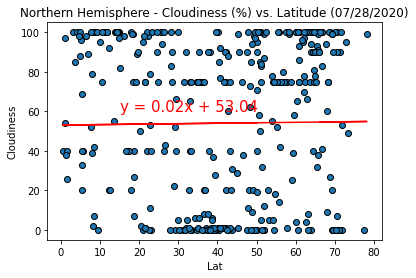

In [27]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Cloudiness"
x_ann = 15
y_ann = 60
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,x_ann,y_ann,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.10145275052501752
y = -0.29x + 39.46


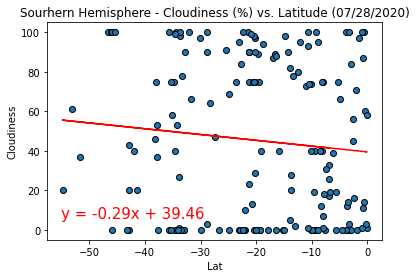

In [28]:
# Sourhern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.title(f"Sourhern Hemisphere - Cloudiness (%) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Cloudiness"
x_ann = -55
y_ann = 6
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,x_ann,y_ann,6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015374869421440805
y = 0.0x + 7.84


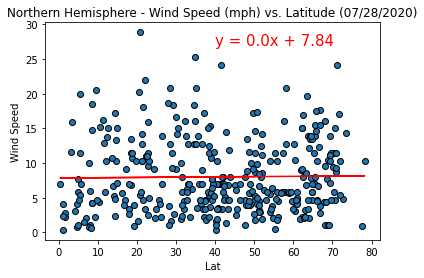

In [29]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Wind Speed"
x_ann = 40
y_ann = 27
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,x_ann,y_ann,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004899714694418208
y = 0.0x + 8.41


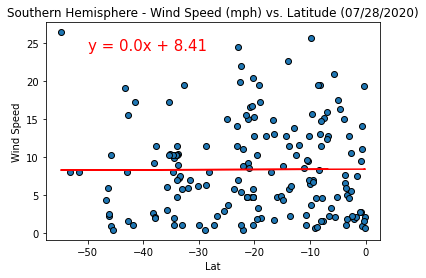

In [30]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ({weatherDate})")
xlbl = "Lat"
ylbl = "Wind Speed"
x_ann = -50
y_ann = 24
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,x_ann,y_ann,8)

## Observations
* As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases.
* Surprised to see that there really isn't any correlation between humidity and latitude. It would be interesting to see what the average dew point is for each city. I believe that dew point is a better indicator for truly how humid it is.
* Cloudiness appears to be a bigger factor the closer you get to the Arctic and Antarctic.